**title**: "FIT5197 2018 S1 Assignment 2"  
**author**: "Chuangfu, 27771539"   
**data**: "21 May 2018"  

## 1. Task A
### A.1. Handle MVs
First, let's load data from the current working directory, then we have a peek at the data.

In [1]:
data_A <- read.csv('./auto_mpg_train.csv', sep = ',')
dim(data_A)

[1] 348   9

By following the instruction, there are some missing value (MV) listed as `'?'`, let's find out these MVs at which col and how many of them:

In [2]:
check_MVs <- function(df){
    for (i in c(1:ncol(df))){
        MV_count = sum(df[i]=='?')
        if (MV_count!=0) print(paste("Col:",i,", Mv:",MV_count))
}}
check_MVs(data_A)

[1] "Col: 4 , Mv: 6"


As there are only 6 row containing MVs ($\frac{6}{348}=1.72\%$), we just drop them since train data cannot contains any MVs:

In [3]:
data_A <- subset(data_A, horsepower!='?')
check_MVs(data_A)

In [29]:
write.csv(data_A, file = "auto_mpg_train_modified.csv")

### A.2 Visualisation

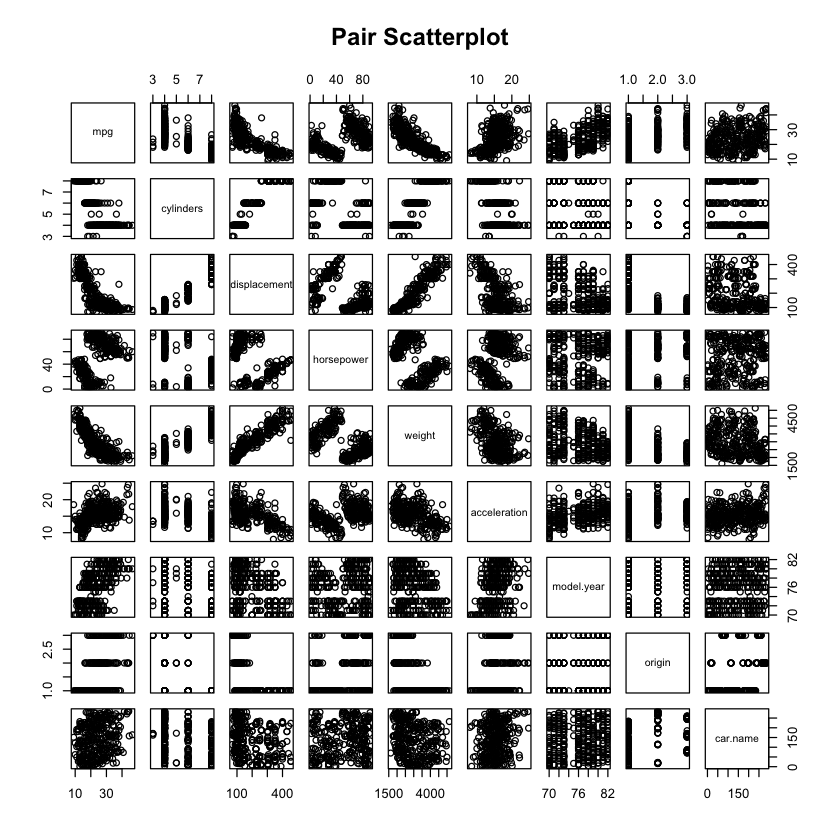

In [4]:
pairs(~mpg+cylinders+displacement+horsepower+weight+acceleration+model.year+origin+car.name,
      data=data_A, 
   main="Pair Scatterplot")

From above, we can clearly find that only the following columns are relative to <font color='blue'>**mpg**</font>: <font color='blue'>**displacement**</font> and <font color='blue'>**weight**</font>. Since their pair scatter plot shows that their relationship with mpg are nearly linear, we can use it for fitting our linear regression model. Let's have a closer look at these data:

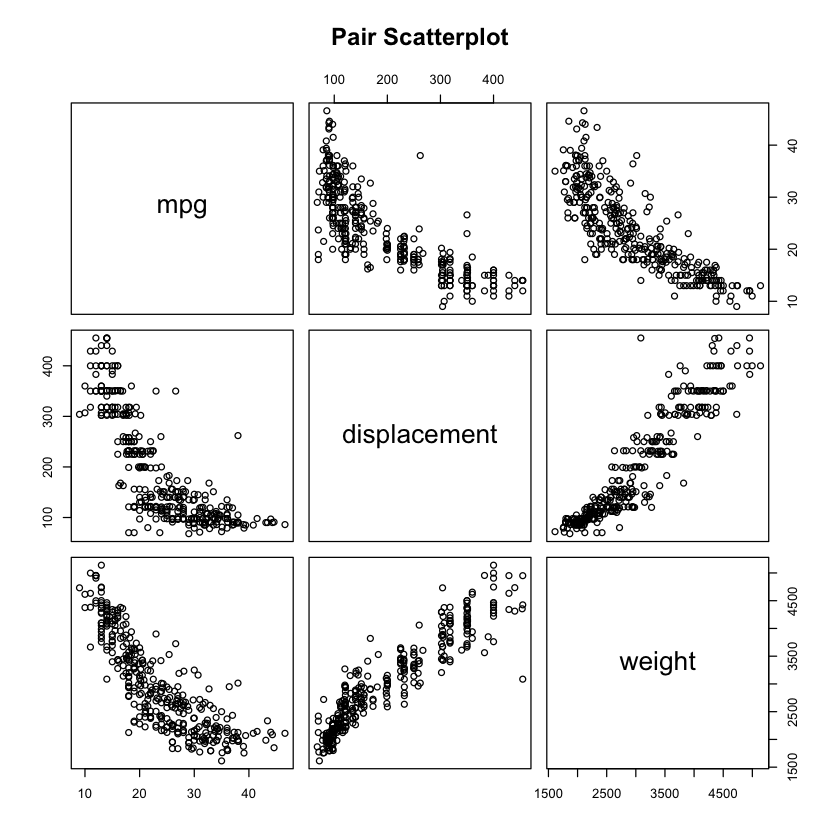

In [5]:
pairs(~mpg+displacement+weight,
      data=data_A, 
   main="Pair Scatterplot")

### A.3 Preprocessiong

Since their relation are nearly linear, we need to employ **power transformation** to improve their linearity beforehand.

According to **Tukey's Ladder of Powers**:

<img src="http://www.math.smith.edu/~bbaumer/mth247/labs/tukey_bulge.png" alt="Ladder of Powers" style="width: 300px;"/>
We should apply $log_{10}(x)$ on <font color='blue'>**displacement**</font> and <font color='blue'>**weight**</font>:

In [6]:
data_A['displacement'] <- lapply(data_A['displacement'], function(x){log(x,10)})
data_A['weight'] <- lapply(data_A['weight'], function(x){log(x,10)})

Let's check their linearity:

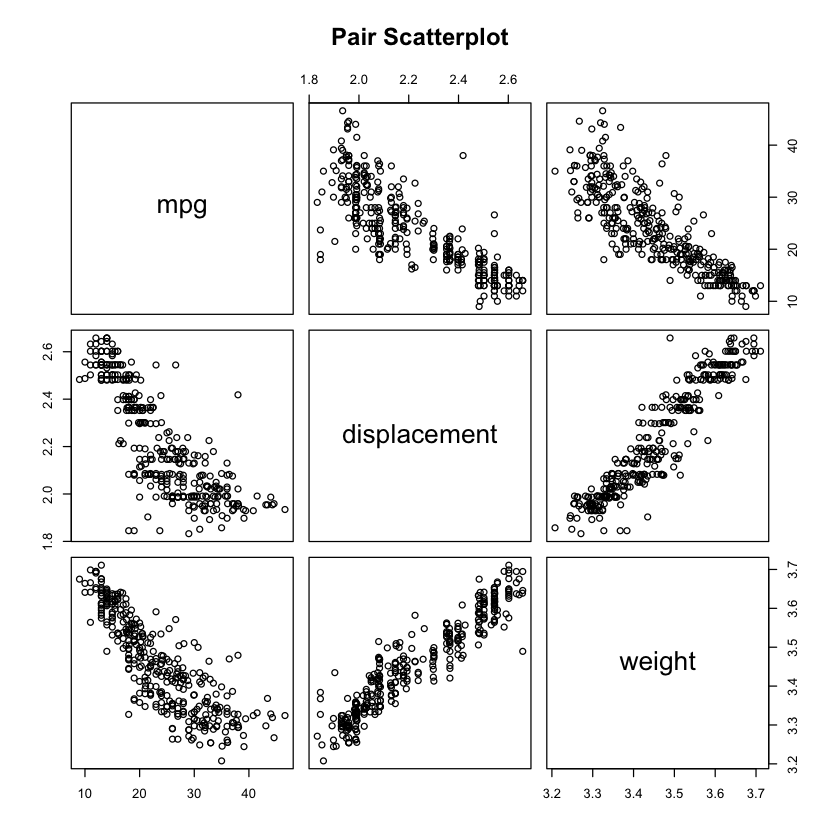

In [7]:
pairs(~mpg+displacement+weight,
      data=data_A, 
   main="Pair Scatterplot")

Now we have linearise these data, we can extract from <font color='blue'>**mpg**</font>, <font color='blue'>**displacement**</font> and <font color='blue'>**weight**</font> to form a new train dataset for our linear regression model:

In [8]:
train_A <- data_A[,c('mpg','displacement','weight'),]

### A.4 Fitting

In [9]:
model <-lm(mpg~displacement+weight, train_A)
summary(model)


Call:
lm(formula = mpg ~ displacement + weight, data = train_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2755  -2.7433  -0.1921   2.1148  16.9611 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   178.328     13.447  13.262  < 2e-16 ***
displacement   -9.325      2.935  -3.177  0.00163 ** 
weight        -38.726      5.617  -6.894 2.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.268 on 339 degrees of freedom
Multiple R-squared:  0.7167,	Adjusted R-squared:  0.715 
F-statistic: 428.8 on 2 and 339 DF,  p-value: < 2.2e-16


```R
Call:
lm(formula = mpg ~ displacement + weight, data = train_A)
```
The first part of the output just shows the arguments we just call.

```R
Residuals:
     Min       1Q   Median       3Q      Max 
-14.2755  -2.7433  -0.1921   2.1148  16.9611
```
The second part show the quartiles of the residuals. It helps us to identify wether the residual look normally distributed around zero or not. The meadian of the residuals should be close to 0 (`-0.1921`), and the abolute value of 1Q and 3Q should be close (`2.7433` v.s `2.1148`). It seems that our model is fairly well.

```R
Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   178.328     13.447  13.262  < 2e-16 ***
displacement   -9.325      2.935  -3.177  0.00163 ** 
weight        -38.726      5.617  -6.894 2.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```
The third part is about the coefficients ($\hat\beta$). Here is some point to understand these number:
1. Intercept ($\hat\beta_{0}$) and slope($\hat\beta_{i}$). We can use these value to plot the regression line.
2. The standard error measure all estimated coefficients' variability. The lower the error and better the fit. 
3. t-values are not imformative, but we can use it for p-values. The lesser the p-value, the more descriptive the predictor variable is.
4. The last line also gives the idea of the significance of relevance. The more star you get, the more relevant the variable is.

Also, we can find that it provides $R^2$ score for checking the goodness of fitting. **0.7167** is high, that means our model fit well with the train dataset. However, we shouldn't so sure before checking the residual plot. let's check:

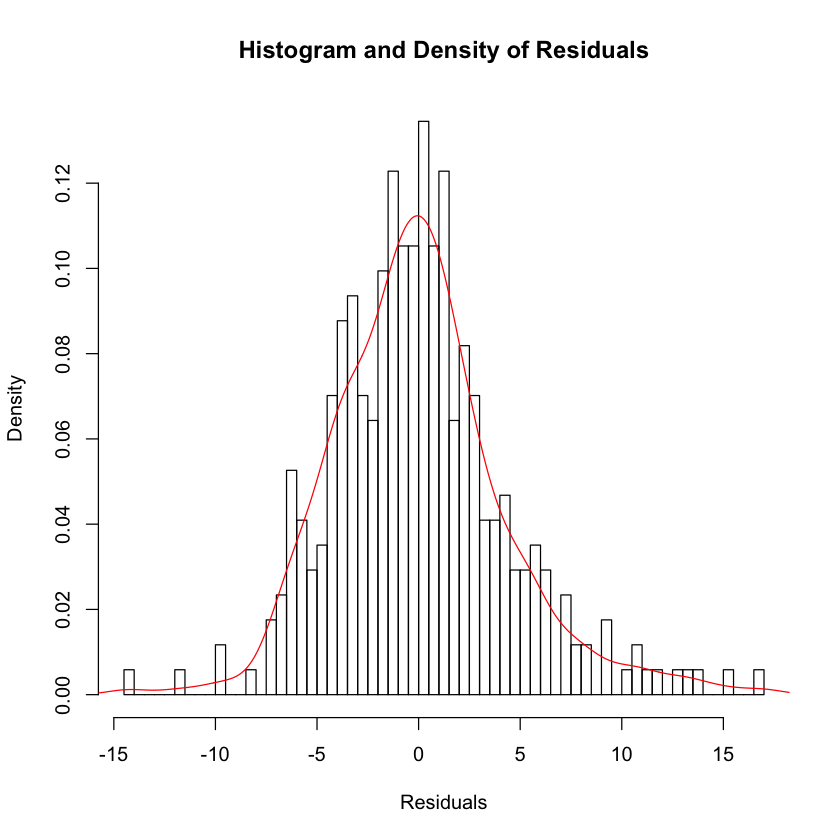

In [10]:
hist(model$residuals,
     breaks = 50,
     main = 'Histogram and Density of Residuals',
     xlab='Residuals',
     probability=T)
lines(density(model$residuals),
      col = 'red'
     )

The above plot confirms that our linear model fitted to the dataset as both histogram and density curve show a nearly normal distribution of residuals.

### A.5 Predict values and evaluate model

In [11]:
data_A_test <- read.csv('./auto_mpg_test.csv',sep = ',')
data_A_test['displacement'] <- lapply(data_A_test['displacement'], function(x){log(x,10)})
data_A_test['weight'] <- lapply(data_A_test['weight'], function(x){log(x,10)})
test_A <- data_A_test[,c('displacement','weight'),]

In [12]:
predict_data <- predict(model, newdata = test_A)

Now, we calculate the Mean Standard error on our test data, since we have the formula:
$$MSE=\frac { 1 }{ N } \sum _{ i=1 }^{ n }{ (y_{ i }-\hat { y_{ i } } )^{ 2 } } $$

In [13]:
mean((data_A_test['mpg']-predict_data)^2)

[1] 9.613281

The mean squared error tells us how close the regression line is to a set of points. The smaller the means squared error, the closer you are to finding the line of best fit. However, the interpretation depends on the pattern of the scatter plot. Then we use another method to evaluate our mode:

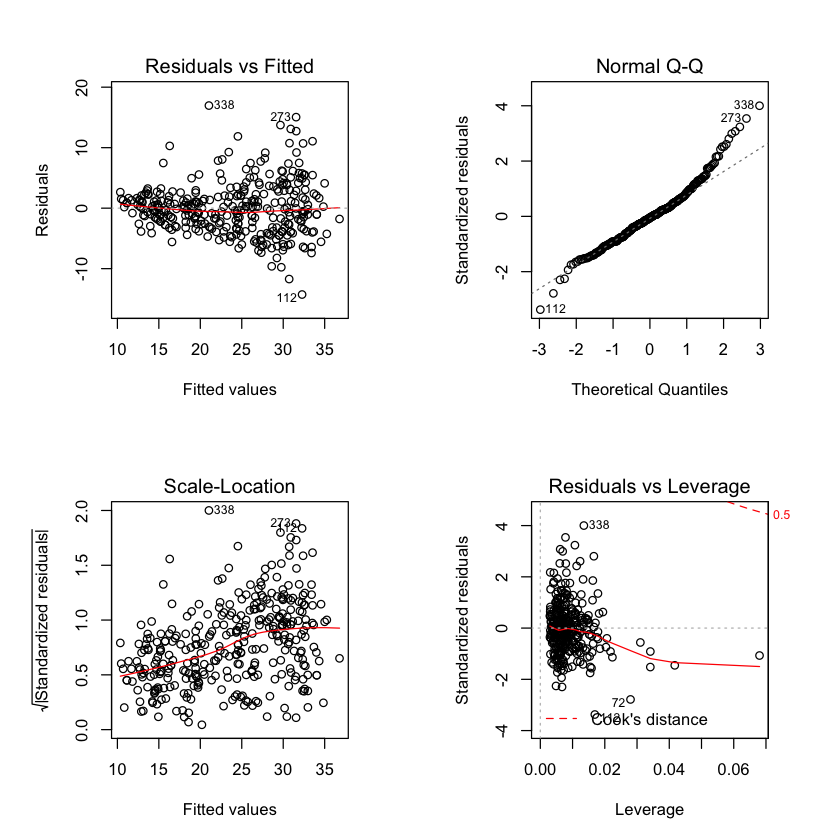

In [14]:
par(mfrow=c(2,2), pty = 's')
plot(model)

Here we can find that in <font color='blue'>**Residuals _versus_ Fitted**</font> plot, horizontal trend line in the plot **indicates a** <font color='red'>**linear pattern**</font> **between response and predictors**. For a good fit, residuals should be almost evenly distributed around zero line without any visible pattern. In this case, our model may suffer from the effect of outliers.

# Task B
## B.1 Handle MVs
First, let's load data from the current working directory, then we have a peek at the data.

In [15]:
data_B <- read.csv('./adult_income_train.csv', sep = ',')

First, let's check how many MVs in this dataset:

In [16]:
check_MVs(data_B)

[1] "Col: 2 , Mv: 2799"
[1] "Col: 7 , Mv: 2809"
[1] "Col: 14 , Mv: 857"


Now we have spotted some MVs in <font color='blue'>**workclass**</font>, <font color='blue'>**occupation**</font> and <font color='blue'>**native_country**</font>. let's take a look what kind of value they have:

In [17]:
summary(data_B[c(2,7,14)])

            workclass               occupation          native_country 
 Private         :30258   Prof-specialty : 5502   United-States:39240  
 Self-emp-not-inc: 3448   Craft-repair   : 5456   ?            :  857  
 Local-gov       : 2810   Exec-managerial: 5410   Mexico       :  844  
 ?               : 2799   Adm-clerical   : 5010   Philippines  :  266  
 State-gov       : 1726   Sales          : 4894   Germany      :  184  
 Self-emp-inc    : 1495   Other-service  : 4388   Canada       :  165  
 (Other)         : 1306   (Other)        :13182   (Other)      : 2286  

From summary above, we can find that the reason why <font color='blue'>**workclass**</font>, <font color='blue'>**occupation**</font> contain MVs: these information might be difficult for people to answer. So does the <font color='blue'>**native_country**</font>. Hence, we just replace this `"?"` into some proper value as `"Unknown"`, `"Not Given"`.

In [18]:
# edit data_B level "?" as "Unknown"
levels(data_B$workclass)[1] <- "Unknown"
# edit level "?" as "Not Given"
levels(data_B$occupation)[1] <- "Not Given"
levels(data_B$native_country)[1] <- "Not Given"

## B.2

We need to make sure that all train data should not contain any MVs, let's check:

In [19]:
levels(data_B$income)[1] <- 0
levels(data_B$income)[2] <- 1

model <- glm(income~., family = binomial, data = data_B)
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = income ~ ., family = binomial, data = data_B)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1131  -0.5027  -0.1823  -0.0336   3.8667  

Coefficients: (2 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.983e+00  3.817e-01 -23.534  < 2e-16
age                                       2.493e-02  1.421e-03  17.547  < 2e-16
workclassFederal-gov                      1.199e+00  1.312e-01   9.142  < 2e-16
workclassLocal-gov                        5.072e-01  1.191e-01   4.258 2.06e-05
workclassNever-worked                    -8.058e+00  8.524e+01  -0.095 0.924684
workclassPrivate                          6.753e-01  1.056e-01   6.396 1.60e-10
workclassSelf-emp-inc                     8.304e-01  1.272e-01   6.528 6.68e-11
workclassSelf-emp-not-inc                 1.356e-01  1.160e-01   1.169 0.242303
workclassState-gov                        3

```R
Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1131  -0.5027  -0.1823  -0.0336   3.8667  
```
The meadian of the residuals close to 0 (-0.1823). The distribution is slightly left tailed as median are more closer to 3Q but not 1Q (0.0336 v.s -0.5027). However, we only need to check its normality if the model is Gaussian. For logistic model, we need to check **Q-Q plot**:

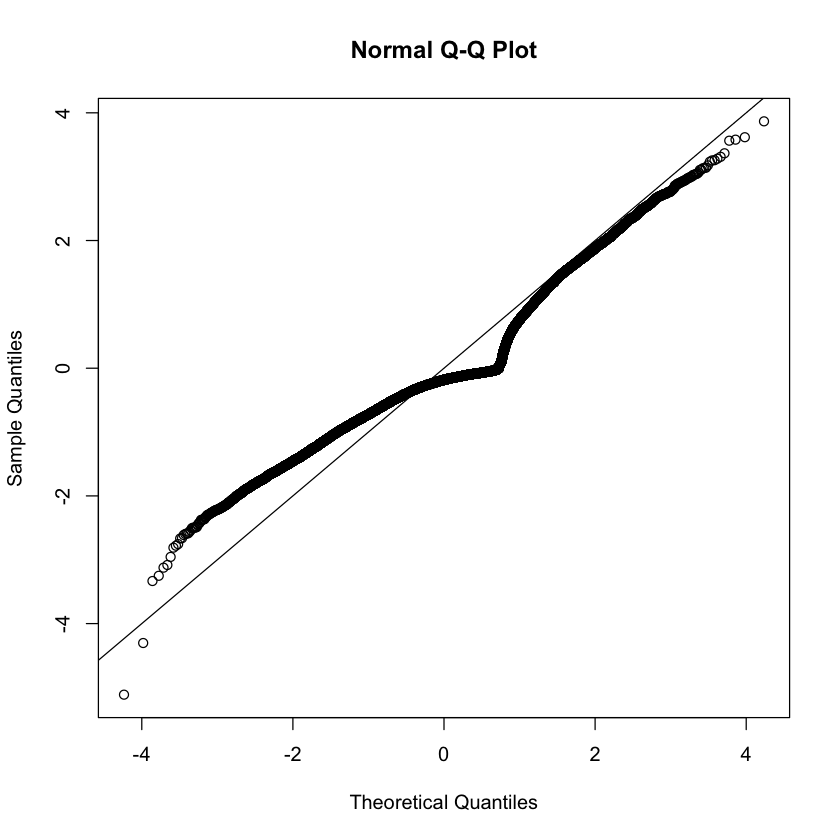

In [20]:
qqnorm(residuals(model, type="deviance"))
abline(a=0,b=1)

In this plot, dots are nearly over the line `y=x`, we can regard the residuals as normally distributed.

With respect to the coefficients significance, we can find that almost all the coefficient have been given 3 stars. It means that most of the variables are relevent to `income`.

## B.3

In [21]:
test_B <- read.csv("./adult_income_test.csv")

In [22]:
predict_data <- predict(model, newdata = test_B)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [23]:
predict_data[predict_data<0] <- '0'
predict_data[predict_data>0] <- '1'
levels(test_B$income)[1] <- '0'
levels(test_B$income)[2] <- '1'

Then, we calculate at what percentage this model correctly predict:

In [24]:
match <- sum(predict_data==test_B$income)
notmatch <- sum(predict_data!=test_B$income)
paste(round(match/(match+notmatch)*100,2), "%")

[1] "84.86 %"

Let's create a **confusion matrix**:

In [25]:
confusion.matrix <- as.matrix(table('Actual'=model$y, 'Prediction'=round(model$fitted.values)))
confusion.matrix

      Prediction
Actual     0     1
     0 31138  2246
     1  4148  6310

From above we can find that: 
* **TP**=31138
* **FP**=2246
* **FN**=4148
* **TN**=6310

Then we can calculate the **accuracy**:

In [26]:
N <- nrow(data_B) # number of observations
diag <- diag(confusion.matrix) # TN and TP
#accuracy = (TP + TN)/N
Accuracy <- sum(diag)/N
paste(round(Accuracy*100,2),"%") # get percentage of accuracy

[1] "85.42 %"

In [27]:
# number of observations per class
rowsums = apply(confusion.matrix, 1, sum)
# number of predictions per class
colsums = apply(confusion.matrix, 2, sum)
# Calculate precision
Precision = diag / colsums
Recall = diag / rowsums
F1 = 2 * Precision * Recall / (Precision + Recall) 
round(data.frame(Precision, Recall)*100,2) 

,Precision,Recall
0,88.24,93.27
1,73.75,60.34
